In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("D:\IT\ML project\Predict depression\depression_dataset_reddit_cleaned.csv")
dataset

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [3]:
sentences = dataset['clean_text']
labels = dataset['is_depression']

In [4]:
training_size = 6000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [6]:
vocab_size = 10000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>', lower=True)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
# print(word_index)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [7]:
print(testing_padded.shape)
print(testing_labels.shape)

(1731, 100)
(1731,)


In [8]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [9]:
embedding_dim = 16
model = Sequential([
    Embedding(vocab_size, output_dim=embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 0.5519 - accuracy: 0.7760 - val_loss: 0.4195 - val_accuracy: 0.9809
Epoch 2/10
188/188 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8513 - val_loss: 0.3274 - val_accuracy: 0.9509
Epoch 3/10
188/188 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.8733 - val_loss: 0.3187 - val_accuracy: 0.9341
Epoch 4/10
188/188 [==============================] - 0s 1ms/step - loss: 0.2419 - accuracy: 0.9000 - val_loss: 0.2539 - val_accuracy: 0.9590
Epoch 5/10
188/188 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9280 - val_loss: 0.2408 - val_accuracy: 0.9561
Epoch 6/10
188/188 [==============================] - 0s 1ms/step - loss: 0.1428 - accuracy: 0.9517 - val_loss: 0.1999 - val_accuracy: 0.9630
Epoch 7/10
188/188 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9687 - val_loss: 0.1937 - val_accuracy: 0.9561
Epoch 

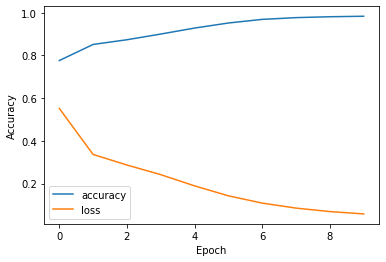

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'loss'])

In [19]:
test_sentence = ['the life became so hard i can not take it any more i just wanna die ']
test_sentence = tokenizer.texts_to_sequences(test_sentence)
padded_test_sentence = pad_sequences(test_sentence, maxlen=max_length)
print(model.predict(padded_test_sentence))

[[0.6440944]]
